# Project: Image Classification using Pipeline dan Gradio

**Description:**

Welcome to your new assignment! In this project, you will have the opportunity to apply the knowledge and skills you've learned in class. The task at hand is to create an image classification project that predicts a person's age based on their photograph. You will be utilizing the power of machine learning pipelines to streamline your workflow and effectively manage the different stages of this project, from data preprocessing to model training and evaluation.

Remember, the goal of this assignment is not just to build a model that makes accurate predictions, but also to understand the process of developing a machine-learning pipeline and the role each component plays in this process.

We encourage you to be creative, explore different strategies, and most importantly, have fun while learning. We can't wait to see the innovative solutions you come up with! Best of luck!

## Student Identity

In [1]:
# @title #### Student Identity
student_id = "READ59HZ" # @param {type:"string"}
name = "Salwa Ziada Salsabiila" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1om9KKI03_VaQtCFi0uMquwPIqWa6vaV4?usp=sharing"  # @param {type:"string"}

## Installation and Import Package

In [2]:
# Install necessary packages
!pip install rggrader
from rggrader import submit, submit_image

# Put your code here:
%pip install -q transformers sentencepiece
!pip install gradio
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from transformers import ViTFeatureExtractor, ViTForImageClassification
import torch
# ---- End of your code ----

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 7.2 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

## Pipeline

**Task 1: Image Classification using Hugging Face's Model**

In this first task, your task is to develop an image classification pipeline that takes **an image URL as input**, displays the image, **and uses the Hugging Face's model to predict the age of the person in the image.** You can get the model [here](https://huggingface.co/nateraw/vit-age-classifier).

Here are the key steps that you might be able to follow:

1. **Image URL Input:** Your program should accept an image URL as input. Make sure to handle potential issues with invalid URLs or inaccessible images.
2. **Image Display:** Display the image from the URL in your notebook. This will provide a visual confirmation that the correct image is being processed.
3. **Model Loading and Prediction:** Load the 'nateraw/vit-age-classifier' model from Hugging Face's model hub and pass the image URL to the model to obtain the prediction. The model should predict the age of the person in the image.
4. **Output Display:** Display the output from the model in a clear and understandable manner.

## Submission

- What percentage is the person in this picture (https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80) is between age of "3-9"?

Submit in the numeric format up to 5 digits behind the decimal point. For example in below output:

```
{'0-2': '0.00152',
 '3-9': '0.00105',
 '10-19': '0.02567',
 '20-29': '3.32545',
 '30-39': '51.75200',
 '40-49': '40.24234',
 '50-59': '4.47803',
 '60-69': '0.17092',
 'more than 70': '0.00304'}
```

The answer would be `0.00105`.

In [3]:
# @title #### 01. Image Classification using Hugging Face's Model

# Put your code here:

# Define the image URL
image_url = "https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80"

# Fetch and display the image
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
plt.imshow(image)
plt.axis('off')
plt.show()

# Load the model
feature_extractor = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')

# Preprocess the image and make prediction
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits.detach().numpy()[0]
ages = ['0-2', '3-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', 'more than 70']
predictions = {age: str(round(float(prob), 5)) for age, prob in zip(ages, logits)}

# Display the predictions
for age, prob in predictions.items():
    print(f'{age}: {prob}')

# Retrieve and display the percentage for the age group "3-9"
percentage_3_9 = float(predictions['3-9'])
print("\nThe percentage for the age group '3-9' is:", percentage_3_9)
# ---- End of your code ----

NameError: name 'requests' is not defined

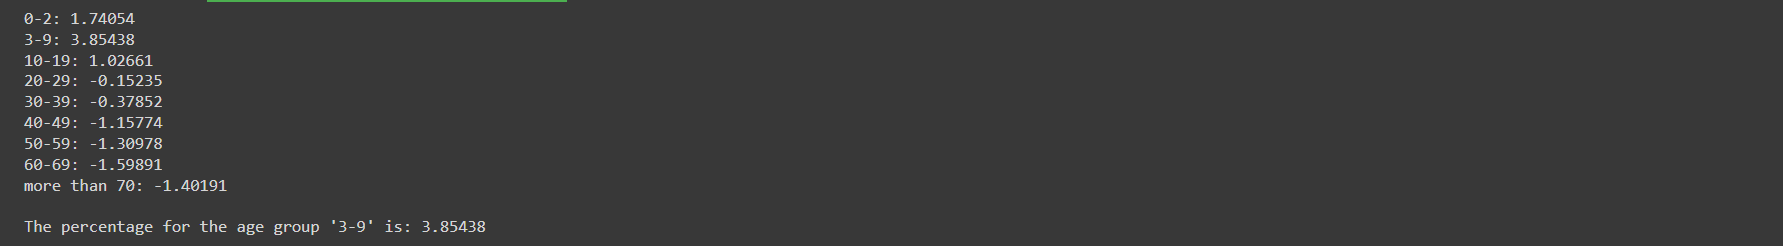

In [ ]:
# Submit Method
assignment_id = "00_pipeline_and_gradio"
question_id = "01_image_classification_using_hugging_faces_model"
answer = "" # Put your answer here
submit(student_id, name, assignment_id, answer, question_id, drive_link)

## Pipeline and Gradio

**Task 2: Image Classification using Hugging Face's Model and Gradio**

In this second task, you will create a user-friendly interface using Gradio for your image classification pipeline that you created in Task 1. The difference with task 1 is, that in this task, you use **image files as input**, process them through the Hugging Face model, and display predictions output. The output displayed is **only the results with the highest `score`**.

Here are the key steps that you might be able to follow:

1. **Image Input:** Create a function to accept an image file as input. The image should be in a format that can be processed by the model.
2. **Model Loading and Prediction:** Load the model from Hugging Face's model hub and pass the image to the model to obtain the prediction. The model predicts the age of the person in the image.
3. **Gradio Interface:** Use Gradio to create a user-friendly interface for your application. The interface should allow users to upload an image file, and it should display the model's output in a clear and understandable manner.
4. **Interface Launch:** Launch the Gradio interface. Make sure that the interface is accessible and easy to use.

## Submisssion

![Upload colab](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/upload-colab.png)

You need to submit screenshot of your Gradio's app. In Google Colab you can just use the "Folder" sidebar and click the upload button. Make sure your screenshot match below requirements:

- You should upload a person's image to that app
- The score should be included at the screenshot


In [ ]:
# @title #### 02. Image Classification using Hugging Face's Model and Gradio

# Put your code here:

# Load the model
feature_extractor = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')

# Define a function to process image file and make prediction
def classify_age(image):
    # Convert image to RGB
    image = Image.fromarray(image).convert('RGB')

    # Preprocess the image and make prediction
    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits.detach().numpy()[0]
    ages = ['0-2', '3-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', 'more than 70']
    predictions = {age: prob for age, prob in zip(ages, logits)}

    # Get the age with the highest probability
    predicted_age = max(predictions, key=predictions.get)
    confidence = predictions[predicted_age]

    return {"score": confidence, "label": predicted_age}

# Create a Gradio interface
iface = gr.Interface(
    fn=classify_age,
    inputs="image",
    outputs="json",
    title="Age Classification",
    description="Upload an image and get the predicted age of the person in the image along with confidence level.",
    allow_flagging=False
)

# Launch the interface
iface.launch()
# ---- End of your code ----

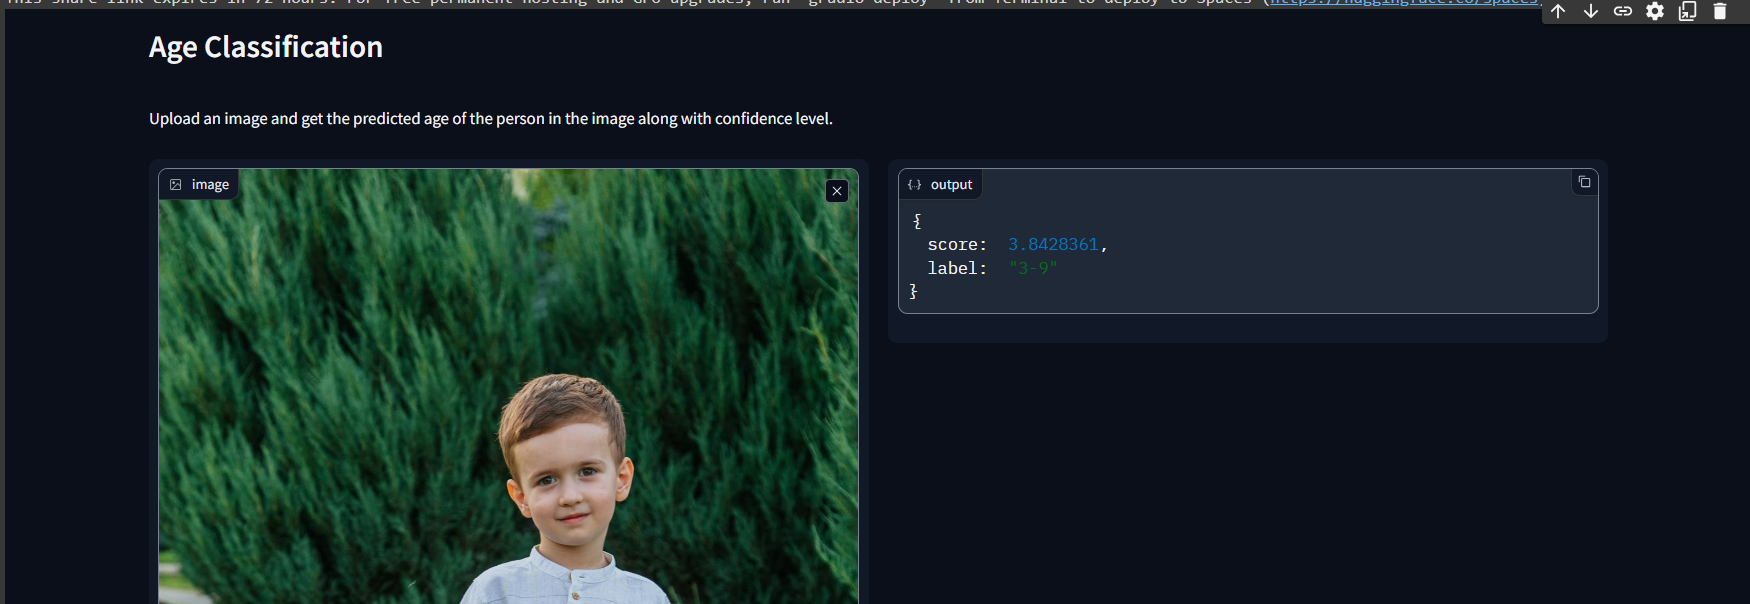

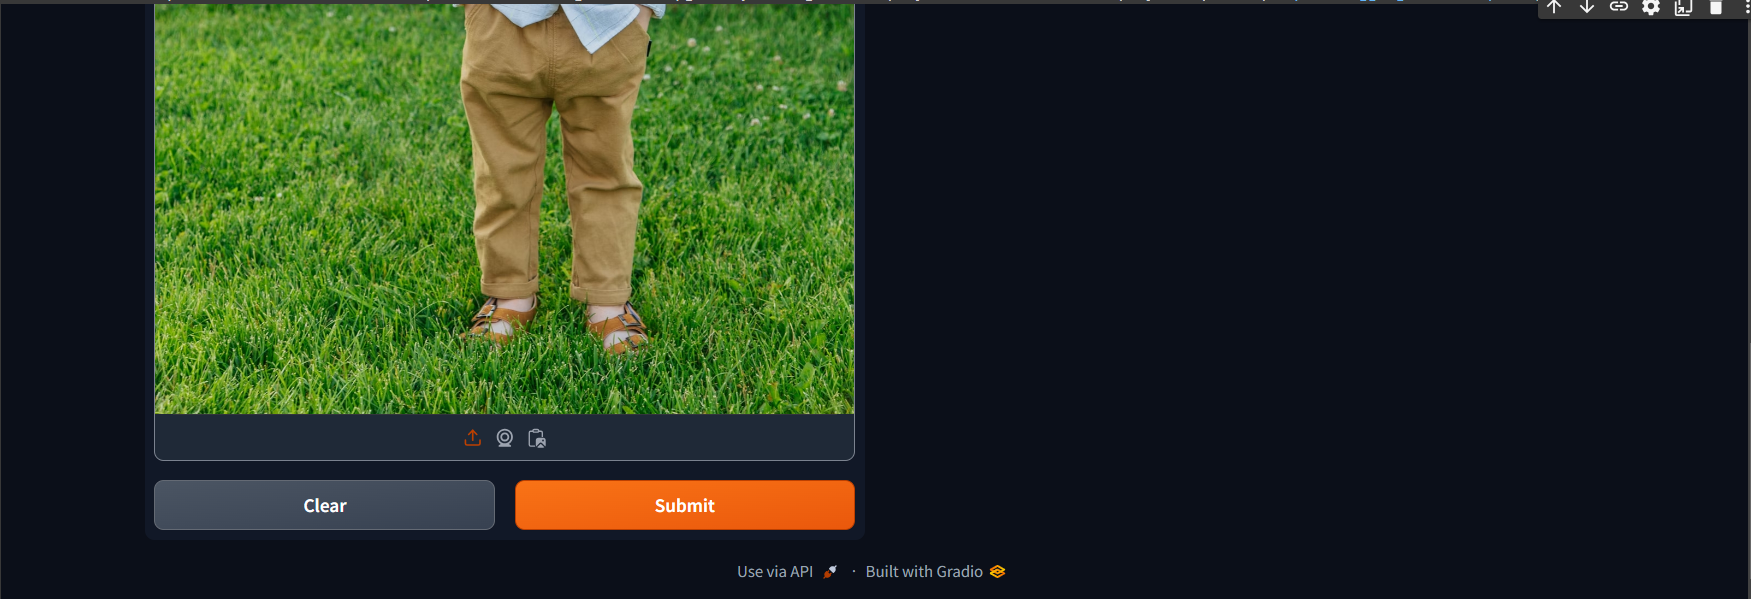

Example of Expected Output:

![gradio-result](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/gradio-result.png)

In [ ]:
# Submit Method
question_id = "02_image_classification_using_hugging_faces_model_and_gradio"
submit_image(student_id, question_id, './submission.png')


> Note: If your submission for Task-2 did not run (After you run it never changes from "*" to a number), stop the Code block that's running the Gradio app, then the submission will run. To stop the Code block, you can click on the Code block and then click the stop button.